In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
import random

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [80]:
df = pd.read_csv("car_data.csv")

In [81]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [82]:
car_array = np.asarray(df)
regr = linear_model.LinearRegression()
regr.fit(car_array[:,1:2], car_array[:,0])
eqn_str = str(round(regr.coef_[0],4)) + " x + " + str(round(regr.intercept_,4))
print(eqn_str)

-0.1725 x + 24764.559


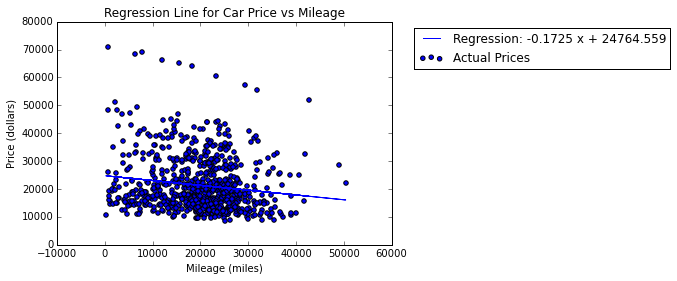

In [83]:
plt.scatter(car_array[:,1:2], car_array[:,0], label="Actual Prices")
plt.plot(car_array[:,1:2], regr.predict(car_array[:,1:2]), label="Regression: "+eqn_str)
plt.title("Regression Line for Car Price vs Mileage")
plt.xlabel("Mileage (miles)")
plt.ylabel("Price (dollars)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [84]:
regr.score(car_array[:,1:2], car_array[:,0])

0.020463447323489481

This shows an extremely poor R^2 value, which is certainly related to the fact that the spread of car prices varries widely. It would be reasonably to say that this coefficient indicates that mileage alone cannot accurately estimate the price of the car. On the other hand, no one would dispute the simple claim that greater mileage reduces the price of a car, and this fact is reflected in the regression. So even a very poor fit contains meaningful information.

In [85]:
part2_df = df[["Mileage", "Cylinder", "Liter", "Doors", "Cruise", "Sound", "Leather"]] 
# mileage, cylinders, liters, doors, cruise, sound, and leather

In [86]:
part2_array = np.asarray(part2_df)
price = car_array[:,0]
regr = linear_model.LinearRegression()
regr.fit(part2_array, price)
c_vals = regr.coef_
eqn_str = ""
for i in range(7):
    eqn_str += str(part2_df.columns[i]) + " " + str(c_vals[i]) + " + "
eqn_str += str(regr.intercept_)
print(eqn_str)

Mileage -0.169747832333 + Cylinder 3792.37893078 + Liter -787.220731634 + Doors -1542.74584638 + Cruise 6288.99714985 + Sound -1993.7952757 + Leather 3349.36161961 + 6758.7551436


In [87]:
mean_val = []
for i in range(7):
    mean_val.append(part2_array[:,i].mean())
print(mean_val)

[19831.93407960199, 5.2686567164179108, 3.0373134328358211, 3.527363184079602, 0.75248756218905477, 0.67910447761194026, 0.72388059701492535]


In [88]:
regr.predict(mean_val) # predicted price for a car with ordinary parameters

array([ 21343.14376733])

In [89]:
regr.score(part2_array, price)

0.4462643536728379

This approach (of correlating several independent factors) gives a much better correlation score, but it is still a far cry from 0.8 for statistical significance.

## Effective combinations of properties

In [90]:
import itertools

In [91]:
list(list(itertools.combinations(list(part2_df.columns), 3))[2]) # this demonstrates how to get combinations

['Mileage', 'Cylinder', 'Cruise']

In [92]:
def run_combs(N):
    max_s = 0
    max_i = 0
    combs = list(itertools.combinations(list(part2_df.columns), N))
    for i in range(len(combs)):
        cols = combs[i]
        part3_df = df[list(cols)]
        part3_array = np.asarray(part3_df)
        regr = linear_model.LinearRegression()
        regr.fit(part3_array, price)
        s = regr.score(part3_array, price)
        if s > max_s:
            max_s = s
            max_i = i
        print(str(list(cols))+"   "+str(s))
    print(" ")
    print(" maximum correlation")
    print(str(list(combs[max_i]))+" "+str(max_s))

In [93]:
run_combs(2)

['Mileage', 'Cylinder']   0.339820708264
['Mileage', 'Liter']   0.329127906685
['Mileage', 'Doors']   0.0403991486712
['Mileage', 'Cruise']   0.209313855832
['Mileage', 'Sound']   0.0368812159674
['Mileage', 'Leather']   0.0452195634089
['Cylinder', 'Liter']   0.325915516016
['Cylinder', 'Doors']   0.343460536583
['Cylinder', 'Cruise']   0.383949132403
['Cylinder', 'Sound']   0.32927527348
['Cylinder', 'Leather']   0.33698000645
['Liter', 'Doors']   0.320515640777
['Liter', 'Cruise']   0.36804584903
['Liter', 'Sound']   0.319264276395
['Liter', 'Leather']   0.323379171899
['Doors', 'Cruise']   0.199638246892
['Doors', 'Sound']   0.037016287709
['Doors', 'Leather']   0.0414181734687
['Cruise', 'Sound']   0.192889480669
['Cruise', 'Leather']   0.221004205218
['Sound', 'Leather']   0.0479536909208
 
 maximum correlation
['Cylinder', 'Cruise'] 0.383949132403


In [94]:
run_combs(3)

['Mileage', 'Cylinder', 'Liter']   0.342280211787
['Mileage', 'Cylinder', 'Doors']   0.360029918965
['Mileage', 'Cylinder', 'Cruise']   0.402374586032
['Mileage', 'Cylinder', 'Sound']   0.345793039452
['Mileage', 'Cylinder', 'Leather']   0.353035789318
['Mileage', 'Liter', 'Doors']   0.338591027665
['Mileage', 'Liter', 'Cruise']   0.387923983906
['Mileage', 'Liter', 'Sound']   0.337525245264
['Mileage', 'Liter', 'Leather']   0.341056916186
['Mileage', 'Doors', 'Cruise']   0.223903140764
['Mileage', 'Doors', 'Sound']   0.0592505439204
['Mileage', 'Doors', 'Leather']   0.0625639212199
['Mileage', 'Cruise', 'Sound']   0.217216569068
['Mileage', 'Cruise', 'Leather']   0.244846434415
['Mileage', 'Sound', 'Leather']   0.0696594062244
['Cylinder', 'Liter', 'Doors']   0.343495478069
['Cylinder', 'Liter', 'Cruise']   0.384062200852
['Cylinder', 'Liter', 'Sound']   0.331848604532
['Cylinder', 'Liter', 'Leather']   0.338532693616
['Cylinder', 'Doors', 'Cruise']   0.400198907955
['Cylinder', 'Door

In [95]:
run_combs(4)

['Mileage', 'Cylinder', 'Liter', 'Doors']   0.360125063303
['Mileage', 'Cylinder', 'Liter', 'Cruise']   0.402584261892
['Mileage', 'Cylinder', 'Liter', 'Sound']   0.348854652244
['Mileage', 'Cylinder', 'Liter', 'Leather']   0.354940443056
['Mileage', 'Cylinder', 'Doors', 'Cruise']   0.419149645107
['Mileage', 'Cylinder', 'Doors', 'Sound']   0.367499129697
['Mileage', 'Cylinder', 'Doors', 'Leather']   0.371331998385
['Mileage', 'Cylinder', 'Cruise', 'Sound']   0.406164498263
['Mileage', 'Cylinder', 'Cruise', 'Leather']   0.422507421477
['Mileage', 'Cylinder', 'Sound', 'Leather']   0.362784103786
['Mileage', 'Liter', 'Doors', 'Cruise']   0.396532669801
['Mileage', 'Liter', 'Doors', 'Sound']   0.348302227867
['Mileage', 'Liter', 'Doors', 'Leather']   0.349405179718
['Mileage', 'Liter', 'Cruise', 'Sound']   0.393468491422
['Mileage', 'Liter', 'Cruise', 'Leather']   0.40678789687
['Mileage', 'Liter', 'Sound', 'Leather']   0.353631538185
['Mileage', 'Doors', 'Cruise', 'Sound']   0.2333692028

I find it somewhat suspicious that mileage is only the 4th best variable at predicting the car's value. We probably have a common-cause at the root of this. Car makers are just more likely to put leather in a car which has a high value. Both cylinders and cruise control are variables which are very obvious in car marketing. It is extremely telling that cylinder had a powerful predictive value while liters (which is a more accurate measure) doesn't perform as well.

## Hard mode

In [96]:
# to begin with, what kind of data are we working with?
df["Make"].value_counts()

Chevrolet    320
Pontiac      150
SAAB         114
Cadillac      80
Buick         80
Saturn        60
dtype: int64

In [97]:
lex = ["Make", "Model", "Trim", "Type"]

In [98]:
for i in range(len(lex)):
    print(lex[i]+" number: "+str(len(df[lex[i]].value_counts())))

Make number: 6
Model number: 32
Trim number: 47
Type number: 5


Since these are much more diverse than just a binary selection, a simplistic method won't work.

In [99]:
new_cols = []
for i in range(len(lex)):
    coli = []
    for j in range(len(df[lex[i]].value_counts())):
        coli.append(df[lex[i]].value_counts().keys()[j])
    new_cols.append(coli)

In [100]:
for i in range(len(new_cols)):
    for j in range(len(new_cols[i])):
        df[new_cols[i][j]] = (df[lex[i]] == new_cols[i][j])

In [101]:
for i in range(len(lex)):
    df = df.drop(lex[i], axis=1)

In [102]:
len(df)

804

In [115]:
rows = np.random.choice(df.index.values, 300)
test_set = df.ix[rows]
train_set = df.drop(df.index[rows])

In [116]:
train_array = np.asarray(train_set)
regr = linear_model.LinearRegression()
regr.fit(train_array[:,1:], train_array[:,0])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [117]:
len(regr.coef_)

97

In [118]:
test_array =  np.asarray(test_set)

In [119]:
regr.score(train_array[:,1:], train_array[:,0]) # very good score for training data

0.99300990258900645

In [120]:
regr.score(test_array[:,1:], test_array[:,0]) # kind of bad score for test data

0.99064174523702997